In [0]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np



In [0]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_test

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

(60000, 784)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

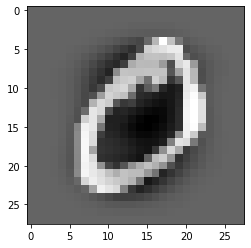

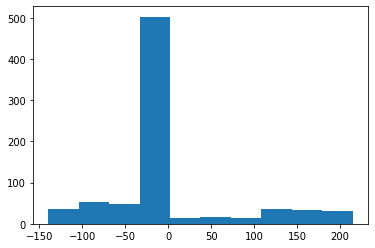

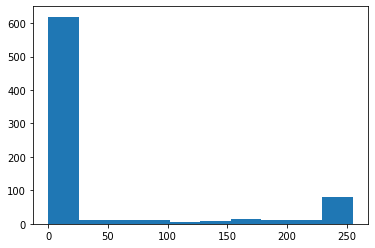

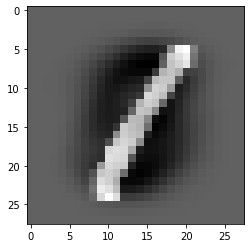

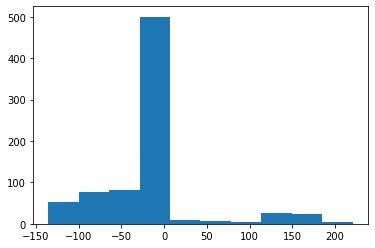

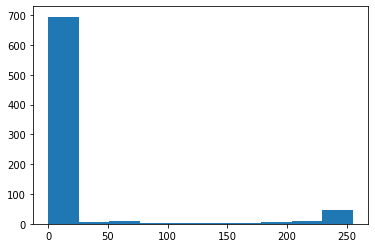

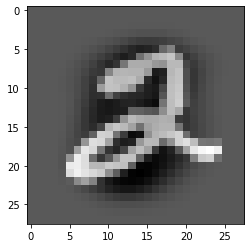

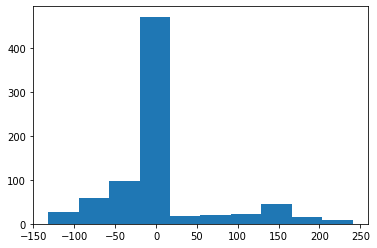

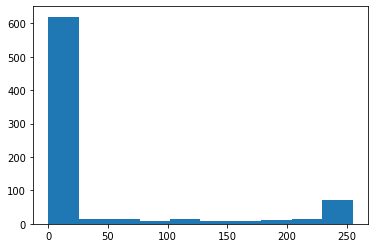

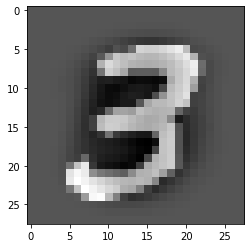

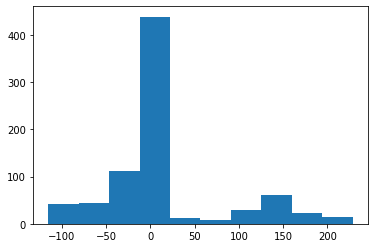

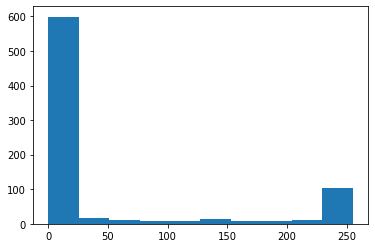

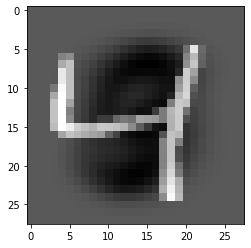

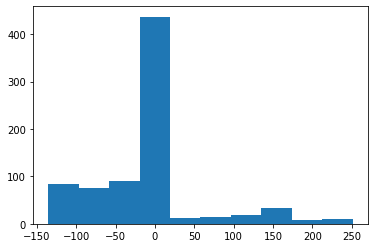

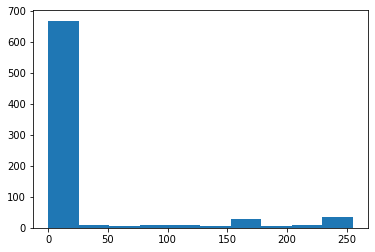

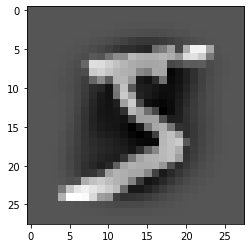

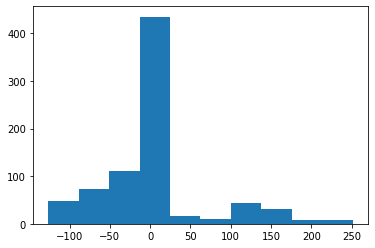

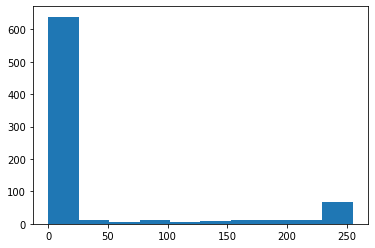

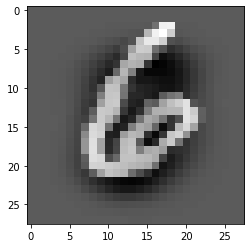

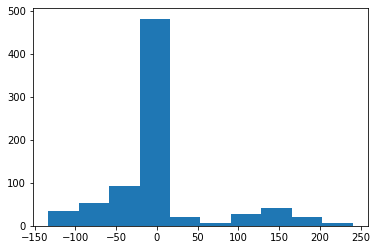

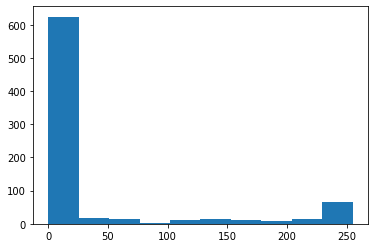

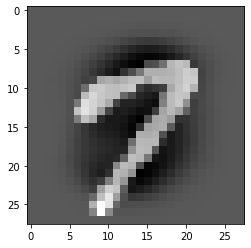

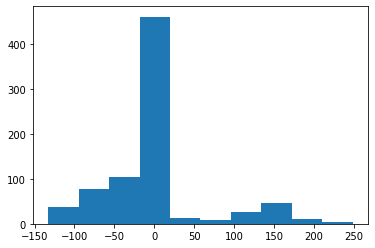

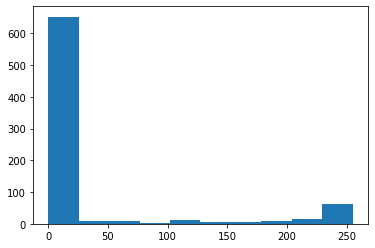

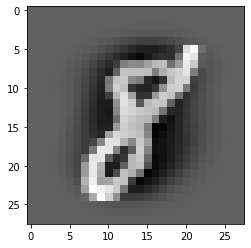

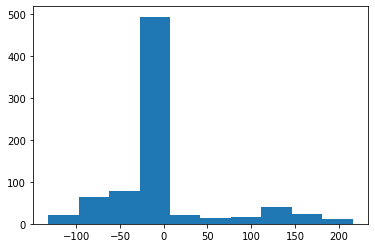

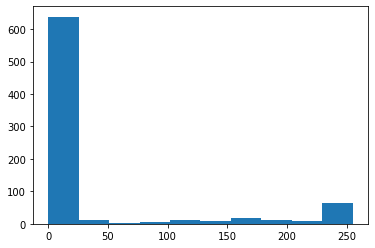

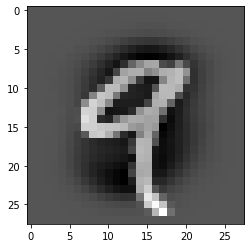

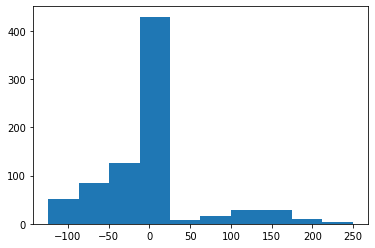

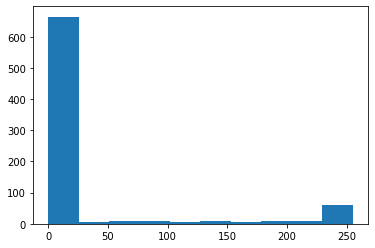

In [0]:
flat_input_train = np.reshape(x_train,(len(x_train),-1))
print(flat_input_train.shape)
flat_input_test=np.reshape(x_test,(len(x_test),-1))

average_image = np.reshape(np.array([x_train[:,x,y].mean() 
    for x in range(0,28) for y in range(0,28)]),(28,28))

for i in range(0,10):
    
    img = x_train[np.where(y_train==i)[0][0] ,:,:]#erses Bilde von Klasse i ist 
    img_average = img -average_image
        
    # get some image
    plt.figure(i)
    plt.imshow(img_average,cmap="gray")

    plt.figure(i+100)
    plt.hist(img_average.flatten())
    plt.figure(i+200) 
    plt.hist(img.flatten())

flat_input_train_minus_averaged=flat_input_train-img_average.flatten()
flat_input_test_minus_averaged=flat_input_test-img_average.flatten()

In [0]:
from keras.utils import to_categorical

y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

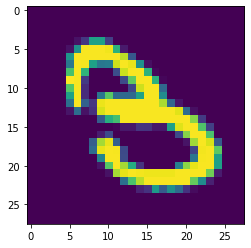

In [0]:
plt.imshow(x_test[18,:,:])

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense

def create_model():
    inputs = Input(shape=(flat_input_train.shape[1],))
    #inputs = Input((784,))
# a layer instance is callable on a tensor, and returns a tensor

    x = Dense(32, activation='relu')(inputs)
   # inputs=Input(shape=(32,))
    x = Dense(64, activation='relu')(x)
    

   # x = Dense(4, activation='hard_sigmoid')(x)
   # x = Dense(10, activation='hard_sigmoid')(x)

    predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    #model.add(Dense(32, input_dim=flat_input_train.shape[1]))
    
    #model.add(Dense(64,activation="relu"))
    
    # Final layer - choose the amount of classes
    #model.add(Dense(10,activation="softmax"))
    return model








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/1





60000/60000 [==============================] - 16s 259us/step - loss: 8.0536 - acc: 0.4928 - val_loss: 7.3091 - val_acc: 0.5426
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
________________________

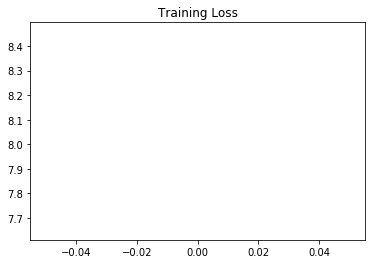

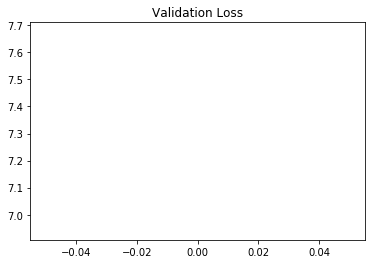

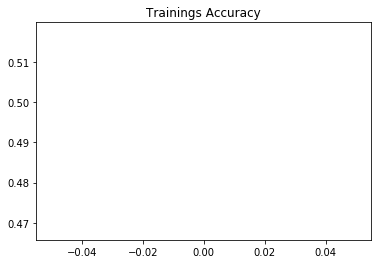

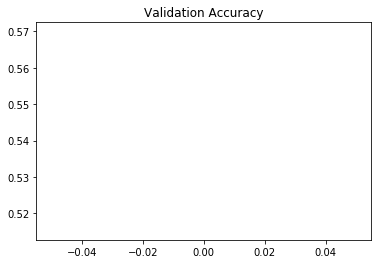

In [0]:
optimizer = "adadelta"

   # print("optimizers_to_test :" ,optimizer)
model = create_model()
    
model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
hist = model.fit(flat_input_train,y_train_cat,validation_data=\
              (flat_input_test,y_test_cat),epochs=1)
    
plt.figure(999)
plt.plot(hist.history["loss"])
plt.title("Training Loss")
   
plt.figure(998)
plt.plot(hist.history["val_loss"])
plt.title("Validation Loss")
    
plt.figure(888)
plt.plot(hist.history["acc"])
plt.title("Trainings Accuracy")
    
plt.figure(887)
plt.plot(hist.history["val_acc"])
plt.title("Validation Accuracy")
y=model.predict(flat_input_test)
print(model.summary())

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


InputLayer ist bei sequential nicht stattgefunden !

In [0]:
i=737

x1=[list(y[i,:]).index(max(list(y[i,:]))) for i in range(0,10000) ]
print(*zip(y_test,x1))
print(y_test[i],y[i])
print(sum(x1==y_test))


(7, 7) (2, 6) (1, 8) (0, 0) (4, 4) (1, 7) (4, 4) (9, 5) (5, 6) (9, 7) (0, 0) (6, 8) (9, 4) (0, 0) (1, 8) (5, 5) (9, 4) (7, 7) (3, 8) (4, 4) (9, 7) (6, 6) (6, 6) (5, 5) (4, 4) (0, 0) (7, 7) (4, 4) (0, 0) (1, 5) (3, 5) (1, 5) (3, 5) (4, 6) (7, 7) (2, 0) (7, 7) (1, 8) (2, 5) (1, 8) (1, 8) (7, 7) (4, 4) (2, 8) (3, 5) (5, 5) (1, 8) (2, 6) (4, 4) (4, 4) (6, 6) (3, 8) (5, 5) (5, 5) (6, 6) (0, 0) (4, 4) (1, 8) (9, 7) (5, 7) (7, 7) (8, 8) (9, 4) (3, 8) (7, 7) (4, 4) (6, 6) (4, 4) (3, 5) (0, 0) (7, 7) (0, 0) (2, 0) (9, 7) (1, 8) (7, 7) (3, 5) (2, 7) (9, 4) (7, 7) (7, 7) (6, 6) (2, 8) (7, 7) (8, 8) (4, 4) (7, 7) (3, 5) (6, 6) (1, 8) (3, 5) (6, 6) (9, 4) (3, 5) (1, 8) (4, 4) (1, 8) (7, 8) (6, 6) (9, 4) (6, 6) (0, 0) (5, 5) (4, 4) (9, 5) (9, 4) (2, 0) (1, 8) (9, 4) (4, 4) (8, 8) (7, 7) (3, 5) (9, 4) (7, 7) (4, 4) (4, 4) (4, 4) (9, 4) (2, 7) (5, 5) (4, 4) (7, 7) (6, 6) (7, 4) (9, 4) (0, 0) (5, 5) (8, 8) (5, 5) (6, 6) (6, 6) (5, 5) (7, 7) (8, 8) (1, 8) (0, 0) (1, 8) (6, 6) (4, 4) (6, 6) (7, 7) (3, 8)

# Merge Layer

In [0]:
input1= Input(shape=(16,))
x=Dense(8,activation="relu")(input1)

from keras.layers import Concatenate
concated=Concatenate()([x,input1])
out =Dense(1,activation="linear")(concated)
model2=Model(inputs=input1, outputs=out)
model2.compile("adam","mean_squared_error", metrics=['accuracy'])

In [0]:
np.random.seed(15)
X=np.random.randint(0,100,size=(100,16))
Y=[np.mean(X[i,:]) for i in range(0,100)]
model2.fit(X,Y,epochs=100)


Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 2676.3133 - acc: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 186us/step - loss: 2192.9147 - acc: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 195us/step - loss: 1877.1276 - acc: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 183us/step - loss: 1700.7321 - acc: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 168us/step - loss: 1581.7984 - acc: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 184us/step - loss: 1552.0490 - acc: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 184us/step - loss: 1534.4991 - acc: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 168us/step - loss: 1511.8626 - acc: 0.0100
Epoch 9/100
100/100 [==============================] - 0s 192us/step - loss: 1486.8756 - acc: 0.0000e+00
Epoch 10/100
100/100 [==============================] - 0s 18

In [0]:
np.mean(abs(model2.predict(X)-Y))

12.011864574813842

# Aufgabe4

In [0]:
from keras.layers import Concatenate

inputs = Input(name="inputs",shape=(flat_input_train.shape[1],))
x1=Dense(64,activation="relu",name="x1")(inputs)
x2=Dense(64,activation="relu",name="x2")(x1)
concatenate1=Concatenate(name="concatenate1")([x1,x2])
x3=Dense(64,activation="relu",name="x3")(concatenate1)
concatenate2=Concatenate(name="concatenate2")([x3,x1])
outputs=Dense(10,activation="softmax",name="output")(concatenate2)

model3=Model(inputs=inputs,outputs=outputs)
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 784)          0                                            
__________________________________________________________________________________________________
x1 (Dense)                      (None, 64)           50240       inputs[0][0]                     
__________________________________________________________________________________________________
x2 (Dense)                      (None, 64)           4160        x1[0][0]                         
__________________________________________________________________________________________________
concatenate1 (Concatenate)      (None, 128)          0           x1[0][0]                         
                                                                 x2[0][0]                   

In [0]:
model3.compile("adamax",loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [0]:
np.random.seed(9)
model3.fit(flat_input_train,y_train_cat,
           validation_data=(flat_input_test,y_test_cat),epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 172us/step - loss: 10.3431 - acc: 0.3561 - val_loss: 9.7386 - val_acc: 0.3947
Epoch 2/15
60000/60000 [==============================] - 10s 165us/step - loss: 9.8141 - acc: 0.3898 - val_loss: 9.7365 - val_acc: 0.3951
Epoch 3/15
60000/60000 [==============================] - 10s 168us/step - loss: 9.1284 - acc: 0.4319 - val_loss: 8.2415 - val_acc: 0.4870
Epoch 4/15
60000/60000 [==============================] - 10s 165us/step - loss: 7.7809 - acc: 0.5146 - val_loss: 6.8625 - val_acc: 0.5722
Epoch 5/15
60000/60000 [==============================] - 10s 167us/step - loss: 6.6651 - acc: 0.5835 - val_loss: 5.6379 - val_acc: 0.6450
Epoch 6/15
60000/60000 [==============================] - 10s 162us/step - loss: 4.5313 - acc: 0.7136 - val_loss: 3.9713 - val_acc: 0.7490
Epoch 7/15
60000/60000 [==============================] - 10s 163us/step - loss: 3.2839 - acc: 0.7914 - val_loss: 2

In [0]:
import os , sys
from google.colab import drive
drive.mount('/content/drive') #get access to drive

os.chdir("/content/drive/My Drive/PYP") # change working directory
print(os.getcwd())# read current work direktory
#model3.save("Aufgabe4.hdf5")

In [0]:
j=model3.to_json();
with open("A4.json","+w") as f:
  f.write(j)

In [0]:
!ls

A4.json  Aufgabe4.hdf5	foo.txt  hi  imgs


# Dropout !


In [0]:

from keras.layers import Dropout
inputs = Input(name="inputs",shape=(flat_input_train.shape[1],))
x1=Dense(64,activation="relu",name="x1")(inputs)
dropout=Dropout(0.2, noise_shape=None, seed=None)(x1)

x2=Dense(64,activation="relu",name="x2")(dropout)
concatenate1=Concatenate(name="concatenate1")([dropout,x2])
x3=Dense(64,activation="relu",name="x3")(concatenate1)
concatenate2=Concatenate(name="concatenate2")([x3,dropout])
outputs=Dense(10,activation="softmax",name="output")(concatenate2)

model4=Model(inputs=inputs,outputs=outputs)
model4.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 784)          0                                            
__________________________________________________________________________________________________
x1 (Dense)                      (None, 64)           50240       inputs[0][0]                     
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 64)           0           x1[0][0]                         
__________________________________________________________________________________________________
x2 (Dense)                      (None, 64)           4160        dropout_1[

In [0]:
model3.compile("adamax",loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [0]:
np.random.seed(9)
model3.fit(flat_input_train,y_train_cat,
           validation_data=(flat_input_test,y_test_cat),epochs=25)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 175us/step - loss: 2.0677 - acc: 0.8696 - val_loss: 2.2615 - val_acc: 0.8573
Epoch 2/25
60000/60000 [==============================] - 10s 168us/step - loss: 2.0440 - acc: 0.8711 - val_loss: 2.0988 - val_acc: 0.8666
Epoch 3/25
60000/60000 [==============================] - 10s 166us/step - loss: 2.0285 - acc: 0.8720 - val_loss: 2.0769 - val_acc: 0.8698
Epoch 4/25
60000/60000 [==============================] - 10s 166us/step - loss: 2.0179 - acc: 0.8729 - val_loss: 2.1691 - val_acc: 0.8622
Epoch 5/25
60000/60000 [==============================] - 10s 168us/step - loss: 2.0068 - acc: 0.8737 - val_loss: 2.0728 - val_acc: 0.8695
Epoch 6/25
60000/60000 [==============================] - 10s 169us/step - loss: 2.0020 - acc: 0.8741 - val_loss: 2.1152 - val_acc: 0.8657
Epoch 7/25
60000/60000 [==============================] - 10s 165us/step - loss: 1.9949 - acc: 0.8743 - val_loss: 2.

In [0]:
with open("A4.json") as f:
  jj=f.read()

from keras.models import model_from_json

m = model_from_json(jj)